# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('txw.csv',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03
1,Total,"Jan 01, 1979",1979/01/01,NaN,NaN,29.03
2,NaN,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35
3,Total,"Jan 02, 1979",1979/01/02,NaN,NaN,31.35
4,NaN,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66
...,...,...,...,...,...,...
24088,NaN,"Dec 23, 2011",2011/12/23,Texas,48.0,48.29
24089,Total,"Dec 23, 2011",2011/12/23,NaN,NaN,48.29
24090,NaN,"Dec 24, 2011",2011/12/24,Texas,48.0,45.36
24091,Total,"Dec 24, 2011",2011/12/24,NaN,NaN,45.36


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
df = df[df.Notes !="Total"].drop(columns=['Notes'])

>3) Make a column called Date that is in the pandas datetime format

In [5]:
df['Date'] = pd. to_datetime(df['Month Day, Year Code'])  
df

,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F),Date
0,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03,1979-01-01
2,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35,1979-01-02
4,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66,1979-01-03
6,"Jan 04, 1979",1979/01/04,Texas,48.0,47.30,1979-01-04
8,"Jan 05, 1979",1979/01/05,Texas,48.0,46.89,1979-01-05
...,...,...,...,...,...,...
24084,"Dec 21, 2011",2011/12/21,Texas,48.0,58.61,2011-12-21
24086,"Dec 22, 2011",2011/12/22,Texas,48.0,57.81,2011-12-22
24088,"Dec 23, 2011",2011/12/23,Texas,48.0,48.29,2011-12-23
24090,"Dec 24, 2011",2011/12/24,Texas,48.0,45.36,2011-12-24


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [6]:
df['Year'] = df['Month Day, Year Code'].apply(lambda x: x.split('/')[0])
df['Month'] = df['Month Day, Year Code'].apply(lambda x: x.split('/')[1])
df['Day'] = df['Month Day, Year Code'].apply(lambda x: x.split('/')[2])

In [7]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

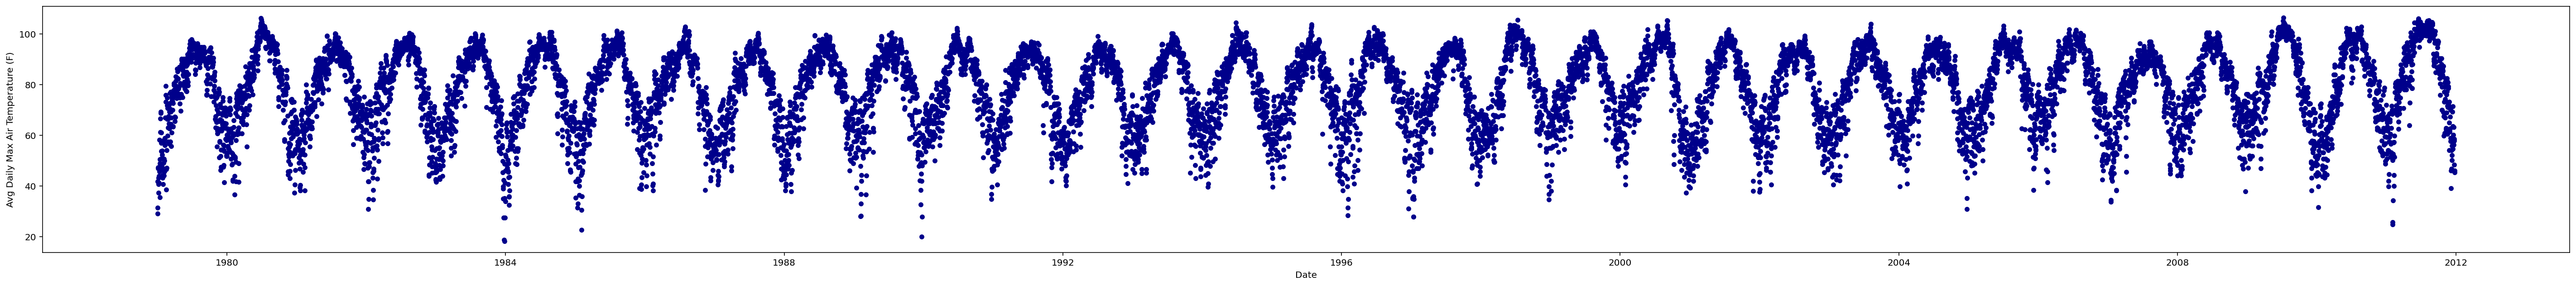

In [8]:
df1 = df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', c='DarkBlue', figsize=(50,5))

>5) Describe your plot.

### Adding colors for our graph

In [9]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))
    
df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

In [10]:
df['color']

0        #000000
2        #000000
4        #000000
6        #000000
8        #000000
          ...   
24084    #cccccc
24086    #cccccc
24088    #cccccc
24090    #cccccc
24092    #cccccc
Name: color, Length: 12047, dtype: object

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

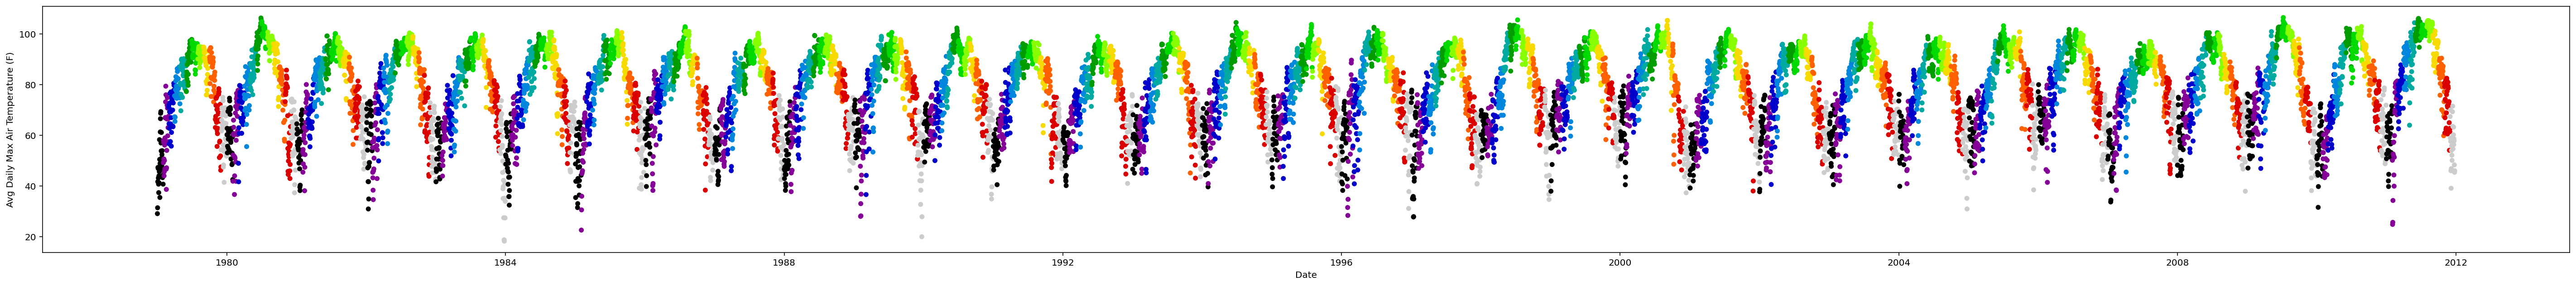

In [11]:
df2 = df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', c=df['color'], figsize=(50,5))

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [22]:
subset = df.drop(df[df['Year'] < '1979'])

KeyError: "['Month Day, Year' 'Month Day, Year Code' 'State' 'State Code'\n 'Avg Daily Max Air Temperature (F)' 'Date' 'Year' 'Month' 'Day' 'DateInt'\n 'color'] not found in axis"

In [ ]:
subset

>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

In [42]:
df3 = subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', c=df['color'], figsize=(50,5))

ValueError: plot kind scatter can only be used for data frames

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [19]:
X = subset['DateInt'].values
Y = subset['Avg Daily Max Air Temperature (F)'].values

NameError: name 'subset' is not defined

In [ ]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [ ]:
Y_pred = lin_reg(X,Y)

In [ ]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['Date'].values), max(subset['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

>12) Is the slope positive or negative? What do you think that means?